In [3]:
## Import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical


In [4]:
# load the MNIST dataset
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
## preprocessing : Normalize the pixel values to be between 0 and 1
train_images=train_images/255.0
test_images=test_images/255.0

In [6]:
## reshape the images to (28,28,1) as they are grayscale
train_images=train_images.reshape((train_images.shape[0],28,28,1))
test_images=test_images.reshape((test_images.shape[0],28,28,1)) 

In [7]:
# covert the lables to one-hot encoded format
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [8]:
## Build the CNN model
model =models.Sequential()

In [9]:
# first convonutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Second convonutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [14]:
## Third convonutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [15]:
## Flatten the 3D output to 1D and add dense layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))


In [16]:
# ouput layer with 10 neurons (for 10 digit classes)
model.add(layers.Dense(10,activation="softmax"))

In [17]:
## compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [18]:
## train the model
model.fit(train_images,train_labels, epochs=5,batch_size=64,validation_data=(test_images,test_labels))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 53ms/step - accuracy: 0.9453 - loss: 0.1837 - val_accuracy: 0.9818 - val_loss: 0.0572
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.9844 - loss: 0.0515 - val_accuracy: 0.9860 - val_loss: 0.0464
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.9887 - loss: 0.0350 - val_accuracy: 0.9842 - val_loss: 0.0464
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 44ms/step - accuracy: 0.9908 - loss: 0.0286 - val_accuracy: 0.9911 - val_loss: 0.0301
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9930 - loss: 0.0229 - val_accuracy: 0.9904 - val_loss: 0.0292


In [19]:
## evalute the mode;
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("test accuracy",test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9904 - loss: 0.0292
test accuracy 0.9904000163078308


In [20]:
#make prediction on test images
prediction=model.predict(test_images)
print(prediction)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[[4.9268166e-08 8.2719600e-07 9.2423863e-07 ... 9.9997437e-01
  1.3406949e-06 1.1230195e-06]
 [2.9325056e-06 6.5936642e-06 9.9998105e-01 ... 1.3444950e-08
  3.5292771e-06 6.1056965e-10]
 [1.2440969e-06 9.9964666e-01 5.3807985e-06 ... 9.9337325e-05
  9.8540459e-06 2.1603341e-06]
 ...
 [7.5287332e-11 4.8614137e-08 3.2690164e-10 ... 9.2086117e-07
  6.1382138e-07 6.6211065e-08]
 [1.7957848e-06 3.4503622e-10 3.9666936e-10 ... 4.2804011e-08
  5.4968754e-05 9.6103836e-09]
 [1.0433955e-06 7.9804154e-09 1.4100088e-05 ... 1.5254263e-09
  8.1949447e-06 8.2911678e-09]]


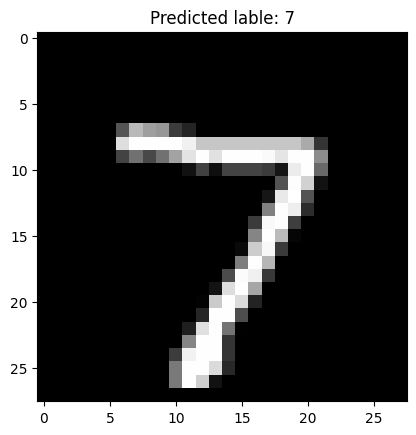

In [24]:
import matplotlib.pyplot as plt
plt.imshow(test_images[0].reshape(28,28),cmap='grey')
plt.title(f"Predicted lable: {prediction[0].argmax()}")
plt.show()